# Task 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [3]:
file_path = "C:/Users/PMLS/Desktop/All desktop things/DS internship/BostonHousing.csv"
df = pd.read_csv(file_path)

In [4]:
print("Dataset Overview:")
print(df.head())
print(df.tail())

Dataset Overview:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93   

In [5]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std   

In [6]:
print("\nDataset Dimensions:", df.shape)


Dataset Dimensions: (506, 14)


In [7]:
df_housing.fillna(df_housing.mean(), inplace=True)
features = df_housing.drop(columns=['medv']) 
target = df_housing['medv'] 

features = (features - features.mean()) / features.std()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)


In [8]:
class CustomLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y
            dW = (1/n_samples) * np.dot(X.T, error)
            dB = (1/n_samples) * np.sum(error)
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * dB

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [11]:
linear_model = CustomLinearRegression(learning_rate=0.01, epochs=1000)
linear_model.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred_linear = linear_model.predict(X_test.to_numpy())

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train Optimized XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=20, max_depth=3, learning_rate=0.1, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Models
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print Model Evaluation Results
print("Linear Regression - RMSE:", rmse_linear, "R²:", r2_linear)
print("Random Forest - RMSE:", rmse_rf, "R²:", r2_rf)
print("XGBoost - RMSE:", rmse_xgb, "R²:", r2_xgb)

Linear Regression - RMSE: 4.8137213777323975 R²: 0.6691009758039841
Random Forest - RMSE: 3.1861174197757403 R²: 0.8550370087531491
XGBoost - RMSE: 3.7596493873287273 R²: 0.798150220357076


C:\Windows\Temp\ipykernel_15684\1726788401.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=rmse_values, palette="coolwarm")


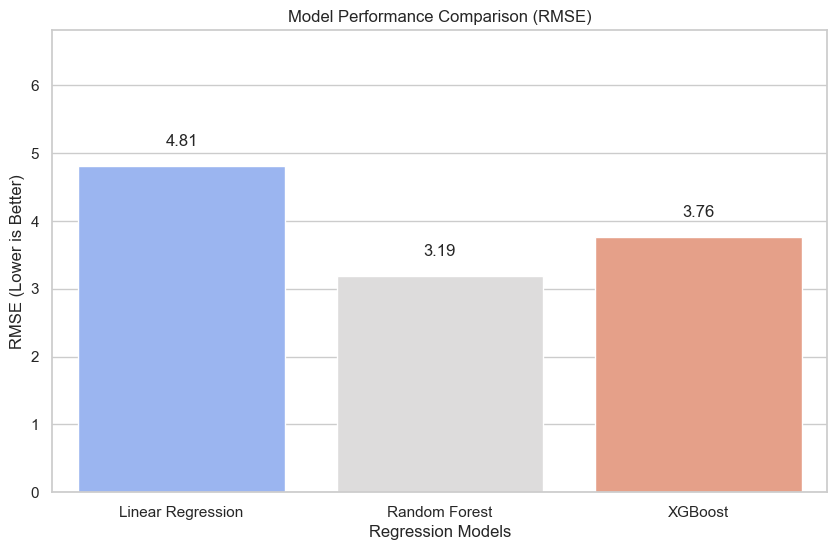

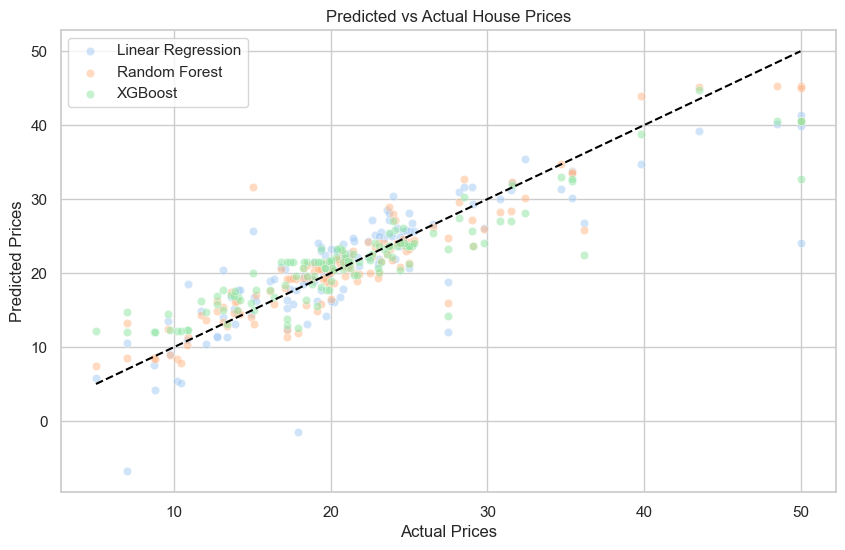

In [ ]:
# Step 5: Visualization of Model Performance
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid", palette="pastel")
model_names = ["Linear Regression", "Random Forest", "XGBoost"]
rmse_values = [rmse_linear, rmse_rf, rmse_xgb]

sns.barplot(x=model_names, y=rmse_values, palette="coolwarm")
plt.xlabel("Regression Models")
plt.ylabel("RMSE (Lower is Better)")
plt.title("Model Performance Comparison (RMSE)")
plt.ylim(0, max(rmse_values) + 2)

for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.3, f"{v:.2f}", ha='center', fontsize=12)

plt.show()


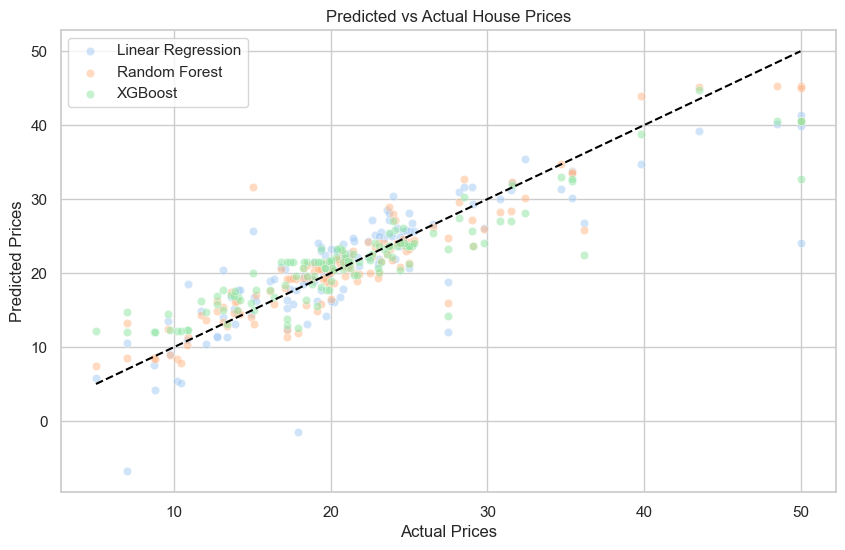

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.5, label='Linear Regression')
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, label='Random Forest')
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5, label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='black')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.legend()
plt.show()


C:\Windows\Temp\ipykernel_15684\331525912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features.columns, palette="viridis")


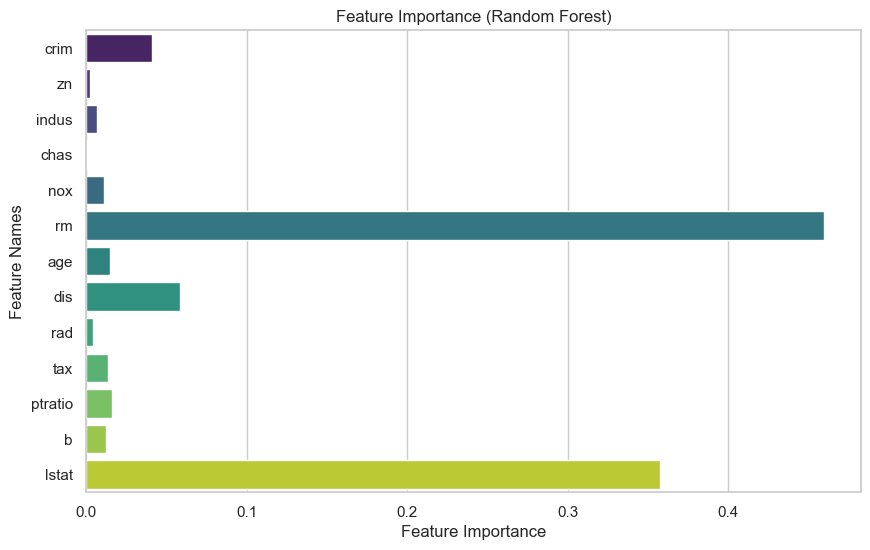

In [17]:
# Plot 2: Feature Importance (Random Forest)
plt.figure(figsize=(10,6))
feature_importances = rf_model.feature_importances_
sns.barplot(x=feature_importances, y=features.columns, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance (Random Forest)")
plt.show()

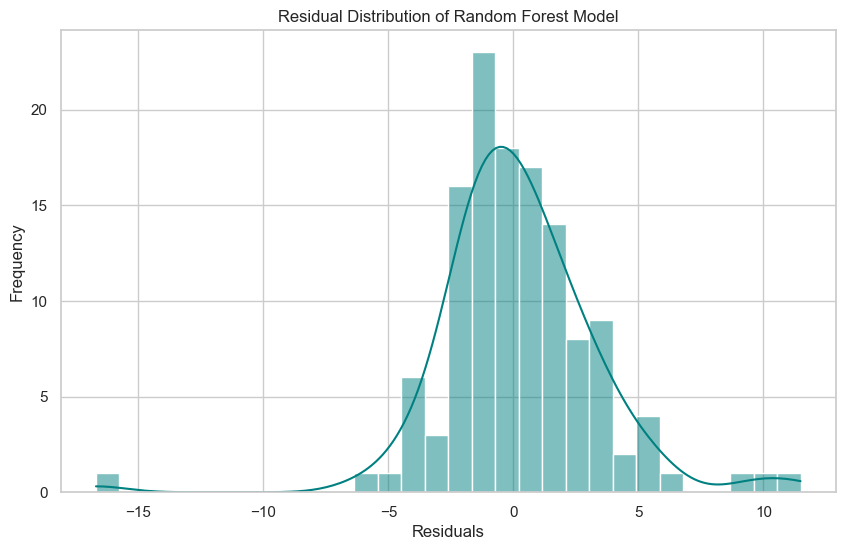

<Figure size 1000x600 with 0 Axes>

In [20]:
plt.figure(figsize=(10,6))
residuals = y_test - y_pred_rf
sns.histplot(residuals, bins=30, kde=True, color='teal')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution of Random Forest Model")
plt.show()
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid", palette="pastel")
model_names = ["Linear Regression", "Random Forest", "XGBoost"]
rmse_values = [rmse_linear, rmse_rf, rmse_xgb]
